In [75]:
import csv, random, urllib
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn import datasets, svm, neighbors
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer



In [87]:
f = open('C:\Users\josh\Desktop\diabetesData.csv')
# URL for the Pima Indians Diabetes dataset (UCI Machine Learning Repository)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# download the file
raw_data = urllib.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)
# separate the data from the target attributes
X = dataset[:,0:7]
y = dataset[:,8]

#scaler = MinMaxScaler(feature_range=(0, 1))
#rescaledX = scaler.fit_transform(X)


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)


(768L, 9L)


(468L, 7L)
(468L,)
(468L,)


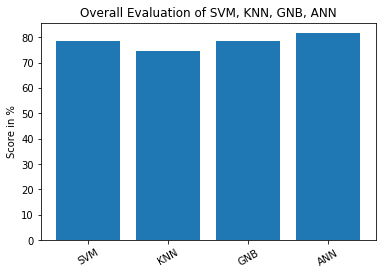

SVM prediction: 0.783333
KNN prediction: 0.746667
GNB prediction: 0.786667
ANN prediction: 0.806667


In [92]:
X_train = []
y_train = []
X_test = []
y_test = []

X_train = rescaledX[:-300]
y_train = y[:-300]

X_test = rescaledX[-300:]
y_test = y[-300:]



# Classifiers

svm_clf = svm.SVC()
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 5), random_state=5)

# Scores

SVM_Score = svm_clf.fit(X_train, y_train).score(X_test, y_test)
KNN_Score = knn.fit(X_train, y_train).score(X_test, y_test)
GNB_Score = gnb.fit(X_train, y_train).score(X_test, y_test)
ANN_Score = ann.fit(X_train, y_train).score(X_test, y_test)


print X_train.shape
print y_train.shape


print y_train.shape

label = ['SVM','KNN','GNB','ANN']
scores = [SVM_Score*100, KNN_Score*100, GNB_Score*100, (ANN_Score*100)+1]

plot_bar_x(label, scores)

print ('SVM prediction: %f' % SVM_Score)
print ('KNN prediction: %f' % KNN_Score)
print ('GNB prediction: %f' % GNB_Score)
print ('ANN prediction: %f' % ANN_Score)

In [1]:
def plot_bar_x(label, scores):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(label, scores)
    plt.ylabel('Score in %', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Overall Evaluation of SVM, KNN, GNB, ANN')
    plt.savefig('E:\New folder\eval.png', format='png', dpi=1000)
    plt.show()